In [1]:
!pip install pmdarima

In [2]:
import sys
print("Python version----", sys.version)
import numpy; print("NumPy version----", numpy.__version__)
import scipy; print("scipy version----", scipy.__version__)
import sklearn; print("sklearn version----", sklearn.__version__)
import pandas; print("pandas version----", pandas.__version__)
import statsmodels; print("statsmodels version----", statsmodels.__version__)
#import pyramid; print("pyramid version----", pyramid.__version__)
import pip; print("pip version----", pip.__version__)
#import x; print("x version----", x.__version__)



Python version---- 3.7.9 | packaged by conda-forge | (default, Dec  9 2020, 21:08:20) 
[GCC 9.3.0]
NumPy version---- 1.21.6
scipy version---- 1.4.1
sklearn version---- 0.22.1
pandas version---- 1.0.1
statsmodels version---- 0.13.5
pip version---- 20.3.3


In [8]:
import warnings
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import pyramid as pm
from sklearn import metrics
#from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
warnings.filterwarnings('ignore')

In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [27]:
fd = sns.load_dataset('flights')
fd.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [13]:

fd.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [14]:
fd.info

<bound method DataFrame.info of      year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
..    ...        ...         ...
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

[144 rows x 3 columns]>

In [15]:
fd_pivot = fd.pivot('month','year','passengers')
fd_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


<Figure size 1080x360 with 0 Axes>

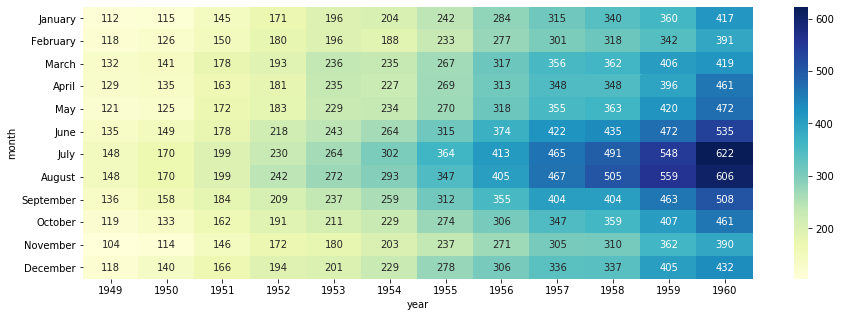

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(fd_pivot, annot=True, fmt='d', cmap='YlGnBu')

In [25]:
month = pd.date_range('19490131', periods=144, freq='M')
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [28]:
fd['datestamp'] = month
fd.head()

,year,month,passengers,datestamp
0,1949,January,112,1949-01-31
1,1949,February,118,1949-02-28
2,1949,March,132,1949-03-31
3,1949,April,129,1949-04-30
4,1949,May,121,1949-05-31


In [29]:
data=fd.loc[:, ('datestamp','passengers')]
data.head()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [30]:
data.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [33]:
data.set_index('datestamp', inplace=True)
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


<Figure size 1080x720 with 0 Axes>

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Passengers in 1000')

Text(0.5, 1.0, '# of Passengers over Time')

<function matplotlib.pyplot.show(*args, **kw)>

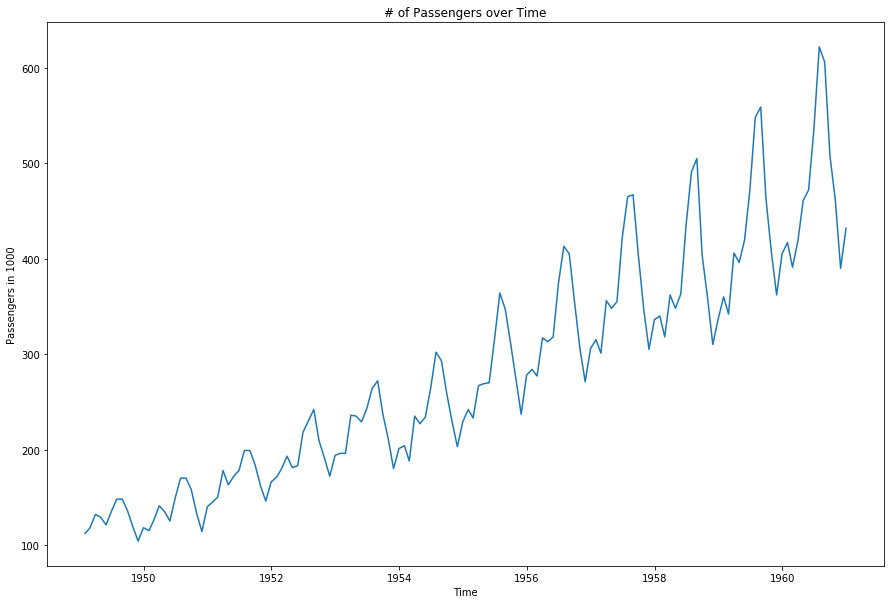

In [34]:
plt.figure(figsize=(15,10))
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Passengers in 1000')
plt.title('# of Passengers over Time')
plt.show

In [36]:
decomposition = seasonal_decompose(data, model='multiplicative')

<Figure size 1440x720 with 0 Axes>

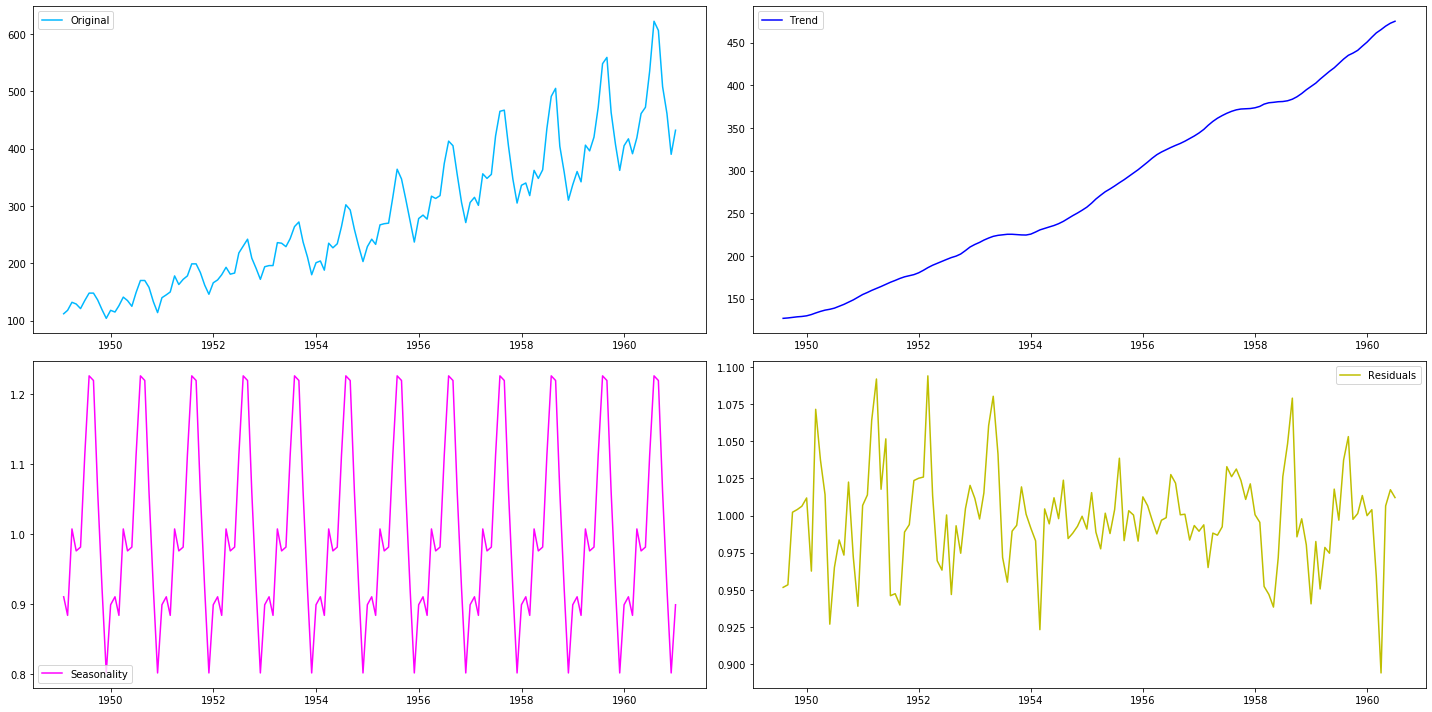

In [52]:
plt.figure(figsize=(20,10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(data, color = '#00b8ff', label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, color='#ff00ff', label='Seasonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, 'y', label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

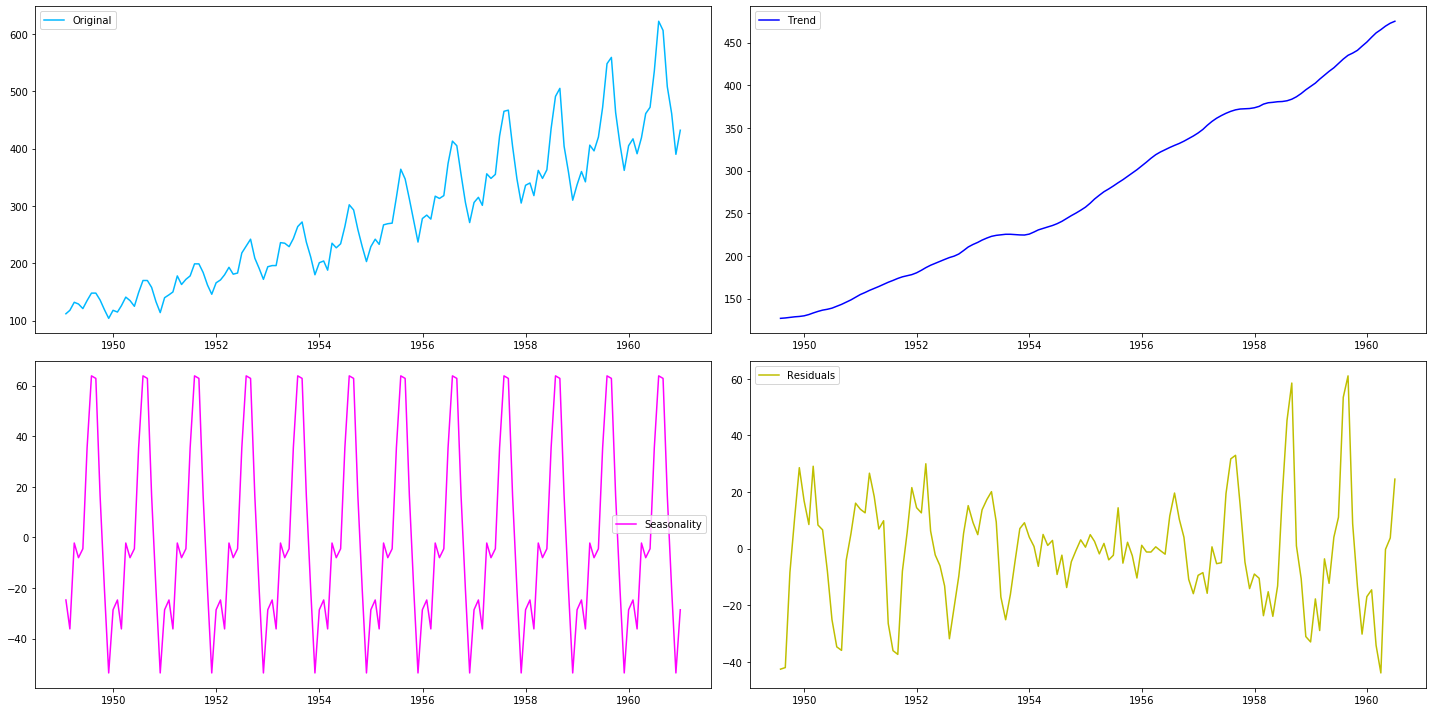

In [53]:
#decomposition = seasonal_decompose(data, model='multiplicative')
decomposition = seasonal_decompose(data, model='additive')

plt.figure(figsize=(20,10))

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(221)
plt.plot(data, color = '#00b8ff', label='Original')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(trend, 'b', label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal, color='#ff00ff', label='Seasonality')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(residual, 'y', label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

In [57]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(data)

/opt/conda/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.01, False)

In [58]:
train, test = data[:100], data[100:]
train.shape, test.shape

((100, 1), (44, 1))

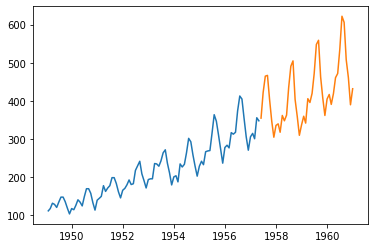

In [59]:
plt.plot(train)
plt.plot(test)
plt.show()

In [60]:
Arima_model = auto_arima(train, start_p=1, start_q=1, max_p=8, max_q=8
                        )
Arima_model.summary()
                             

NameError: name 'Arima_model' is not defined